In [14]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.animation as animation
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [15]:
plt.style.use('dark_background')
sample_nb = 100
X, y = make_blobs(n_samples=sample_nb, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

dimensions de X: (100, 2)
dimensions de y: (100, 1)


In [16]:
def initialization(X):
    W = np.random.randn(X.shape[1], 1)
    #b = np.random.randn(1)
    #W = [0.94635847,-1.23327132]
    b = 1.45551715
    return (W, b)

In [17]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [18]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [19]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

In [20]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [21]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = sample_nb):
    # W & b initialization
    W, b = initialization(X)

    history = []
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        history.append([W, b, Loss, i])
    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    '''plt.plot(Loss)
    plt.legend("Log loss")
    plt.title("Log loss evolution")
    plt.show()'''

    return history

In [22]:
def predict(X, W, b):
    A = model(X, W, b)
    #print("Probability of toxicity: ", A)
    return A >= 0.5

In [23]:
def draw3dPlotting():
    fig = go.Figure(data=[go.Scatter3d(
        x=X[:, 0].flatten(),
        y=X[:, 1].flatten(),
        z=y.flatten(),
        mode='markers',
        marker=dict(
            size=5,
            color=y.flatten(),
            colorscale='YlGn',
            opacity=0.8,
            reversescale=True
        )
    )])

    fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
    fig.layout.scene.camera.projection.type="orthographic"
    fig.show()

In [24]:
def draw3DSigmoid():
    W = history[len(history) - 1][0]
    b = history[len(history) - 1][1]
    print(W)
    print(b)
    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    xx0, xx1 = np.meshgrid(X0, X1)
    Z = W[0] * xx0 + W[1] * xx1 + b
    A = 1 / (1 + np.exp(-Z))

    fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity=0.7, reversescale=True)]))
    fig.add_scatter3d(
        x=X[:, 0].flatten(),
        y=X[:, 1].flatten(),
        z=y.flatten(),
        mode='markers',
        marker=dict(
            size=5,
            color=y.flatten(),
            colorscale='YlGn',
            opacity=0.9,
            reversescale=True
        )
    )
    fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
    fig.layout.scene.camera.projection.type="orthographic"
    fig.show()

In [25]:
def animate(params):
    print(params)
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]

    ax[0].clear() # Decision border
    ax[1].clear() # Sigmoid
    ax[2].clear() # Cost function

    s = 300
    # Decision border
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolors='k', linewidths=3)

    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()

    x1 = np.linspace(-3, 6, 100)
    x2 = (-W[0] * x1 -b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)

    ax[0].set_xlim(X[:, 0].min(), X[:, 0].max())
    ax[0].set_ylim(X[:, 1].min(), X[:, 1].max())
    ax[0].set_title('Decision border')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')

    # Sigmoid
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='#008066', edgecolors='k', linewidths=3, s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='#FFFF66', edgecolors='k', linewidths=3, s=s)
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title('Sigmoid')
    ax[1].set_xlabel('Z')
    ax[1].set_ylabel('A(Z)')

    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], ymin=0, ymax=1 / (1 + np.exp(-z[y==0][j])), color='red', alpha=0.5, zorder=-1)

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], ymax=1, ymin=1 / (1 + np.exp(-z[y==1][j])), color='red', alpha=0.5, zorder=-1)

    # Cost function
    ax[2].plot(range(i), loss[:i], color='red', lw=4)
    ax[2].set_xlim(loss[-1] * 0.8, len(loss))
    ax[2].set_ylim(0, loss[0] * 1.1)
    ax[2].set_title('Cost function')
    ax[2].set_xlabel('iteration')
    ax[2].set_ylabel('Loss')


0.92
[[ 1.31970894]
 [-1.42553481]]
1.4649796763440752
Is the plant toxic :  [ True]


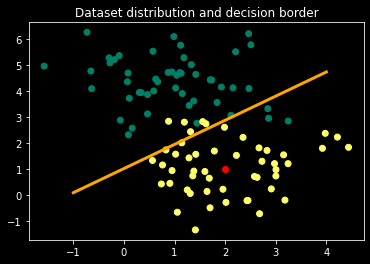

[[ 1.31970894]
 [-1.42553481]]
1.4649796763440752


[array([[ 1.67147038],
       [-0.35493051]]), 1.4155681464566399, [1.2900583297009243, 0.969066484949518, 0.7306494102798835, 0.5651348765052663, 0.45458181287169835, 0.38135668881812634, 0.3322660033617185, 0.2985923117223421, 0.2748795508568112, 0.25775679003283036, 0.2451156458060736, 0.23560473037534452, 0.2283330583243503, 0.22269672698127996, 0.21827594846214812, 0.21477232717557102, 0.2119695872477224, 0.20970830710509689, 0.20786924664363937, 0.2063620854053481, 0.20511765369512688, 0.2040824708169673, 0.20321483956891986, 0.20248201081774744, 0.2018580967828399, 0.20132251651915126, 0.20085882516213294, 0.20045382352214824, 0.2000968749151118, 0.19977937683499877, 0.1994943494531165, 0.19923611304629987, 0.19900003366574, 0.1987823215565231, 0.19857987062731078, 0.19839013005995332, 0.19821100122293808, 0.1980407546077808, 0.19787796268304753, 0.19772144545600612, 0.19757022621852924, 0.19742349548385374, 0.1972805815323382, 0.1971409263057033, 0.1970040656414453, 0.196869613

KeyboardInterrupt: 

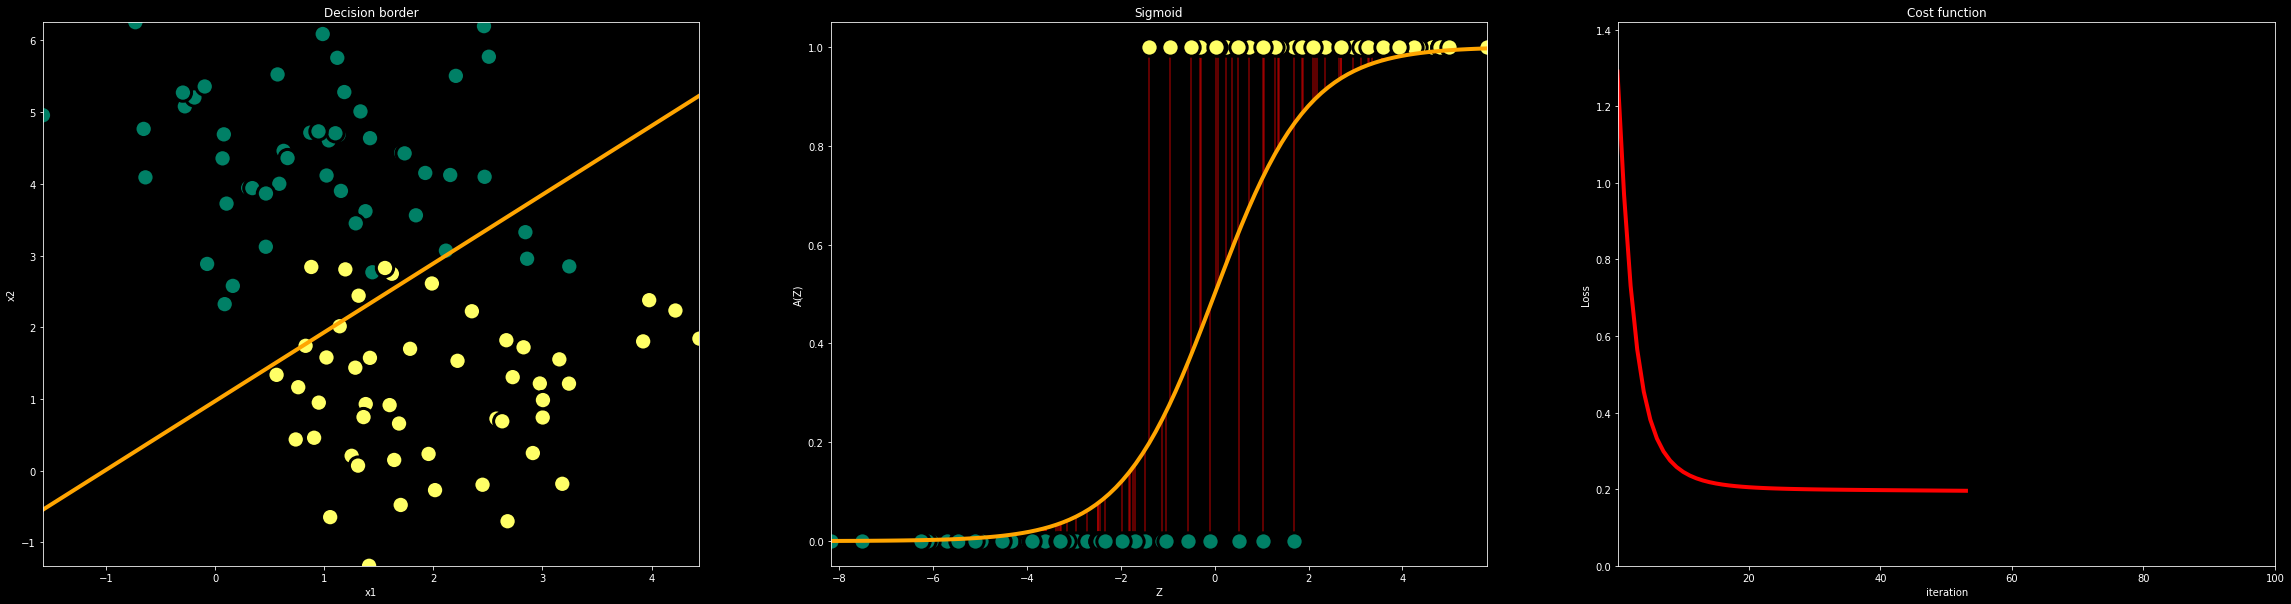

In [26]:
'''########################################
#               Testing                #
########################################'''
history = artificial_neuron(X, y)
#print(history)
#print(history[0])
#print(history[1])
lastW = history[len(history) - 1][0]
lastb = history[len(history) - 1][1]
print(lastW)
print(lastb)

new_plant = np.array([2, 1])
x0 = np.linspace(-1, 4, 100)
x1 = (-lastW[0] * x0 - lastb) / lastW[1]

print("Is the plant toxic : ", predict(new_plant, lastW, lastb))

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3)
plt.title("Dataset distribution and decision border")
plt.show()

draw3DSigmoid()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
anim = animation.FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)
anim.save('animation.gif', writer="pillow", fps=30, bitrate=3200)